# Fungi Classification Data Preprocess/Visualization

In [362]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# basic data info

In [ ]:
# import data
data = pd.read_csv('mushrooms.csv')

In [136]:
data.shape

(8124, 23)

In [61]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [64]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [71]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# visualization preprocessing

In [ ]:
# create list from categorical columns 
cat_cols = list(data.columns)
# remove target from categorical list for plot purposes
cat_cols.remove('class')

In [51]:
# function to plot all categorical variables against target
def plot_cats(df, cat, target):
    fig, ax = plt.pyplot.subplots()
    ax = sns.countplot(x=cat, hue=target, data=df)
    ax.set_title(f'Count Poisonous VS Edible BY {cat}')

# visualizations

<ipython-input-51-982a1e4c8a72>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.pyplot.subplots()


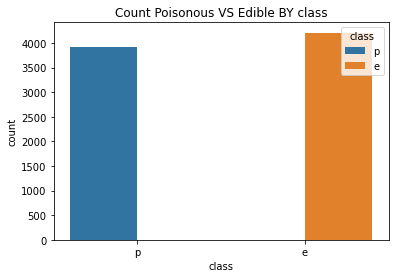

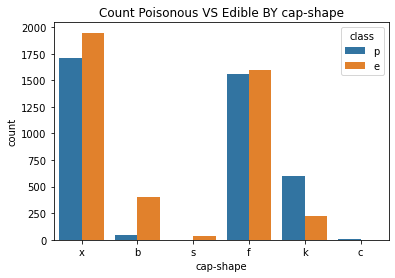

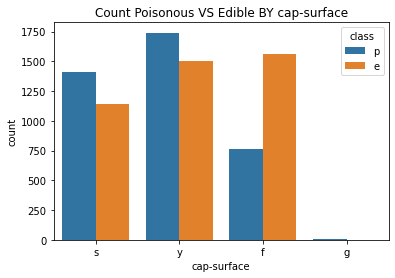

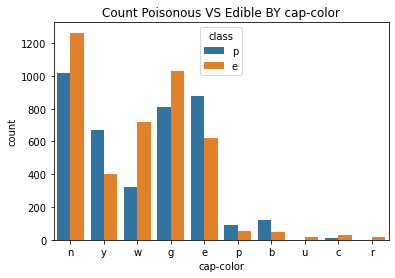

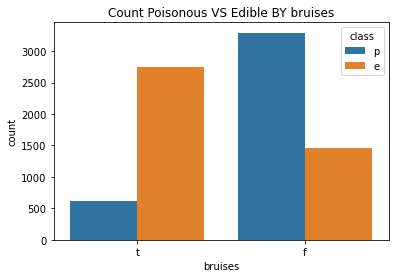

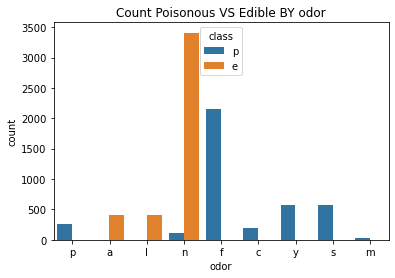

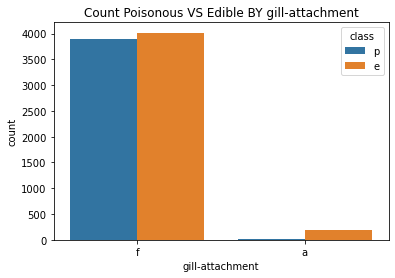

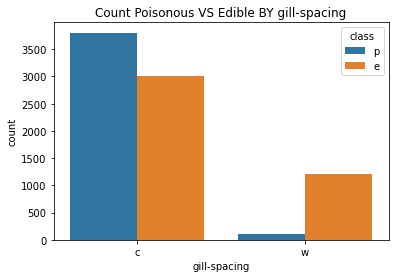

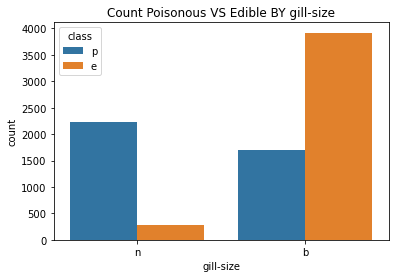

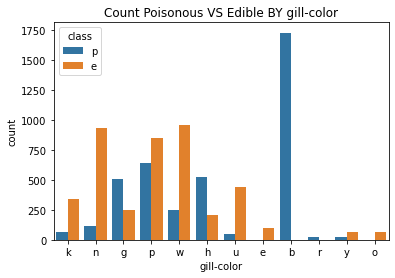

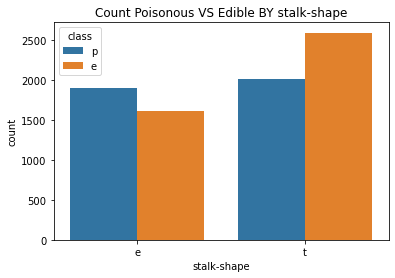

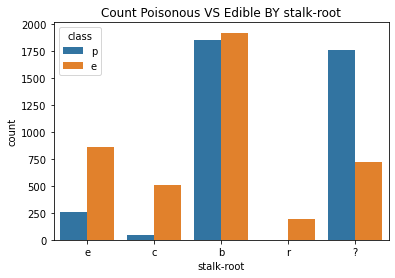

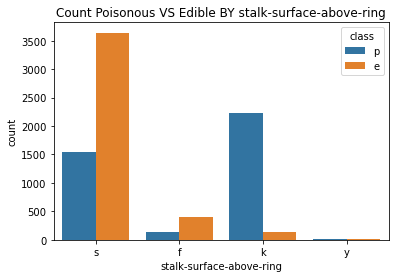

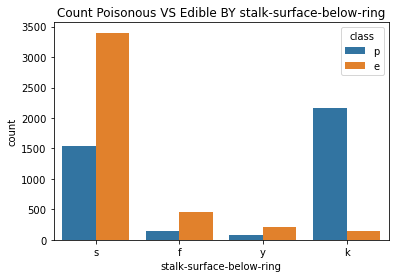

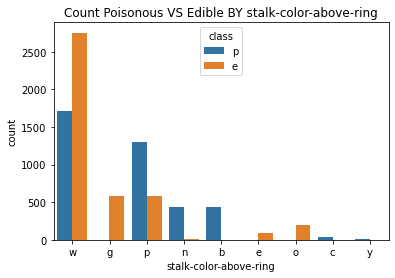

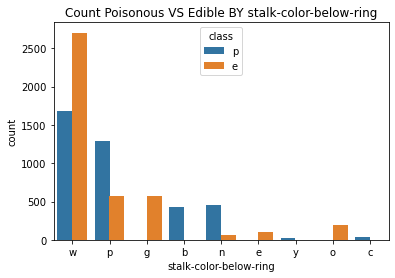

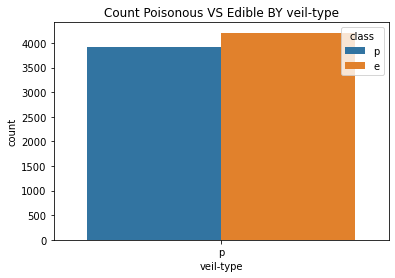

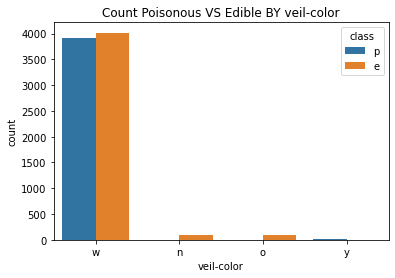

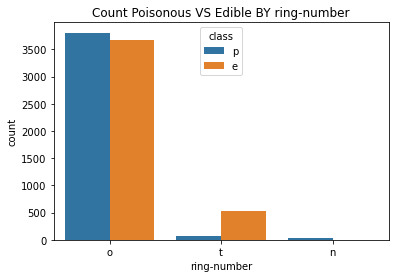

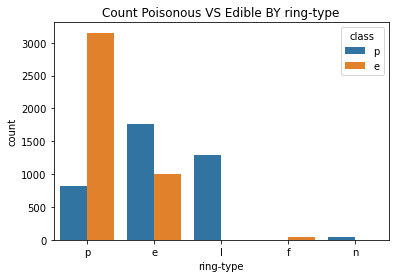

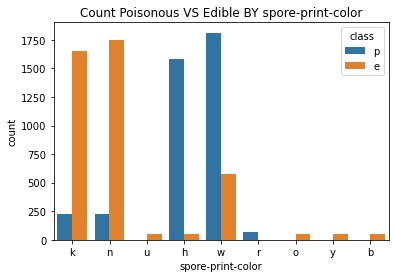

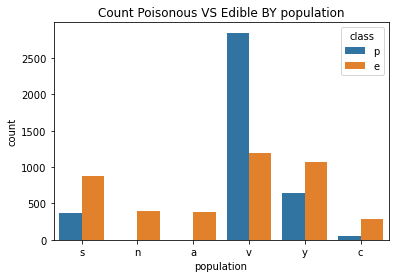

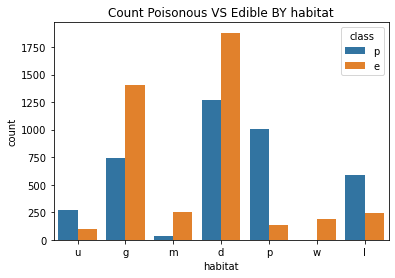

In [52]:
for x in cat_cols:
    plot_cats(data, x, 'class')

In [160]:
# from graphs, it looks like there is only one response in veil-type category
data['veil-type'].describe()

count     8124
unique       1
top          p
freq      8124
Name: veil-type, dtype: object

In [167]:
# drop due to fact that there is no info gained from category
data.drop(columns=['veil-type'], inplace=True)

# assess data balance and look at poisonous and edible data separately

In [168]:
# create poisonous only df
p_df = data[data['class'] == "p"]
#create edible only df
e_df = data[data['class'] == "e"]

In [169]:
p_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916
unique,1,5,4,8,2,7,2,2,2,10,...,4,4,6,6,2,3,4,5,4,6
top,p,x,y,n,f,f,f,c,n,b,...,k,k,w,w,w,o,e,w,v,d
freq,3916,1708,1740,1020,3292,2160,3898,3804,2224,1728,...,2228,2160,1712,1680,3908,3808,1768,1812,2848,1268


In [170]:
e_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
unique,1,5,3,10,2,3,2,2,2,10,...,4,4,6,6,3,2,3,8,6,7
top,e,x,f,n,t,n,f,c,b,w,...,s,s,w,w,w,o,p,n,v,d
freq,4208,1948,1560,1264,2752,3408,4016,3008,3920,956,...,3640,3400,2752,2704,4016,3680,3152,1744,1192,1880


# process X and y data

In [171]:
features = data.drop(columns=['class'])

## label encode categorical variables

In [172]:
le = LabelEncoder()

In [173]:
from pandas.api.types import CategoricalDtype

In [312]:
data = data.astype('category')

In [313]:
le_df = data.apply(le.fit_transform)   

## feature selection using variance

In [314]:
le_df.var()

class                        0.249708
cap-shape                    2.573872
cap-surface                  1.512586
cap-color                    6.481204
bruises                      0.242900
odor                         4.425676
gill-attachment              0.025184
gill-spacing                 0.135432
gill-size                    0.213624
gill-color                  12.534142
stalk-shape                  0.245513
stalk-root                   1.125946
stalk-surface-above-ring     0.386212
stalk-surface-below-ring     0.456941
stalk-color-above-ring       3.616643
stalk-color-below-ring       3.637761
veil-color                   0.058888
ring-number                  0.073476
ring-type                    3.246022
spore-print-color            5.677084
population                   1.567709
habitat                      2.958316
dtype: float64

In [377]:
X_vf = le_df.filter(['gill-color','cap_color',
                     'odor', 'stalk-color-below-ring', 
                     'spore-print-color'], axis=1) 

In [484]:
X_vf_ohe = ohe.fit_transform(X_vf)

In [369]:
le_df.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


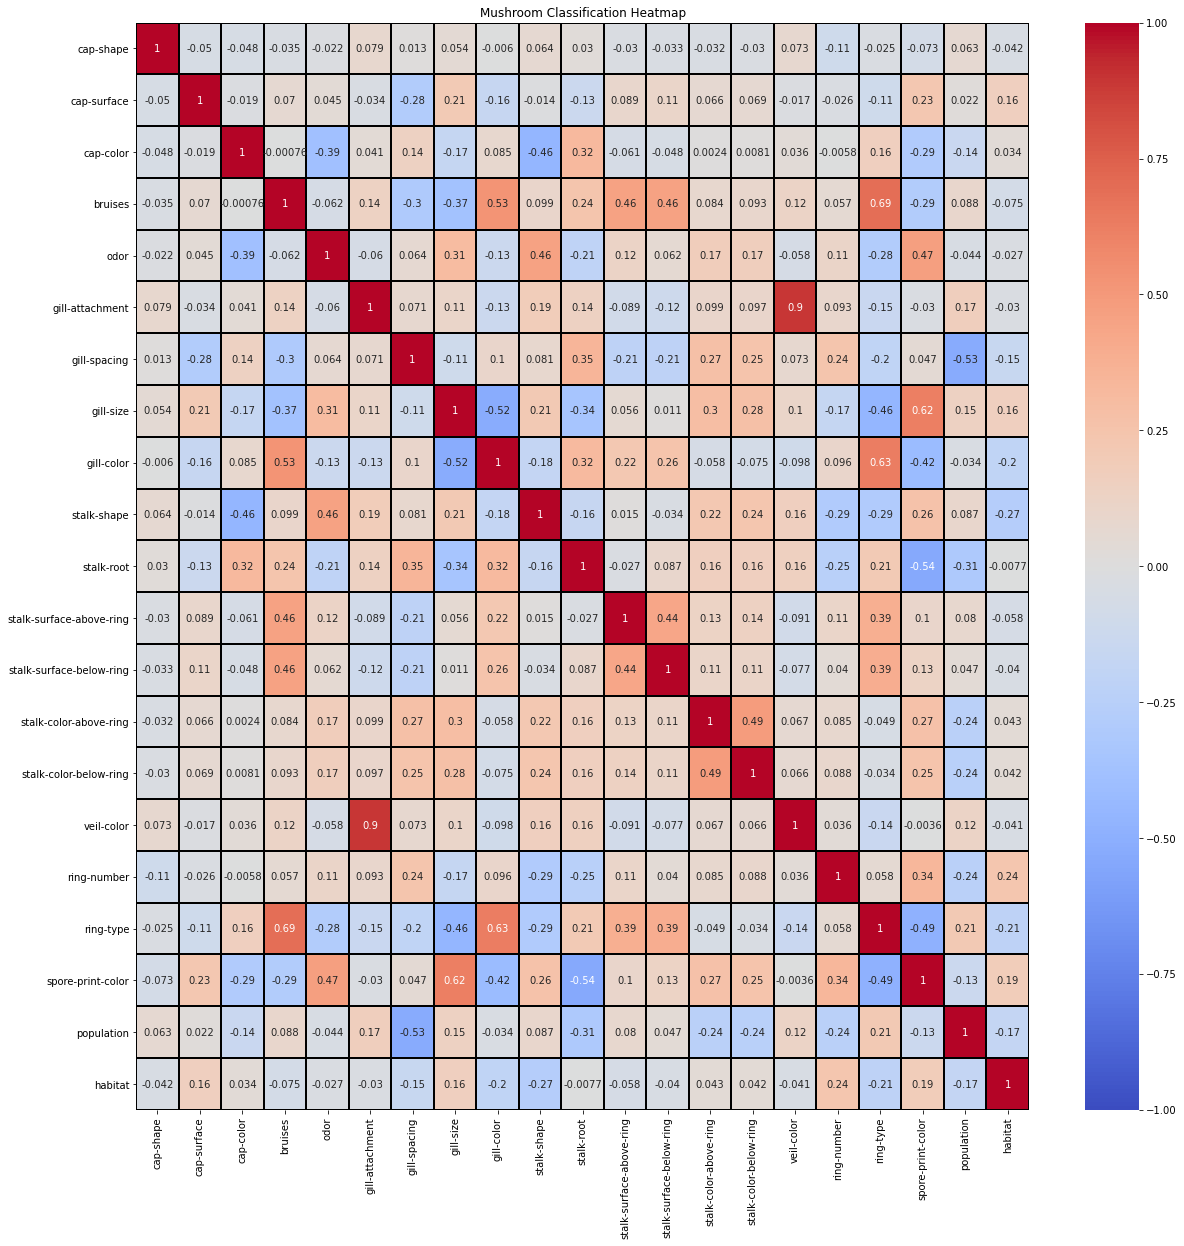

In [363]:
#heat map to assess correlation/collinearity
fig, ax = plt.subplots(figsize=(20, 20))

    
sns.heatmap(le_df.corr(), annot = True,  fmt='.2g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=1, linecolor='black')
ax.set_title('Mushroom Classification Heatmap')
plt.show() 

## define target variable, 1=poisonous, 0=edible

In [315]:
y = le_df['class']

## define feature variables

In [316]:
le_df.drop(columns=['class'], inplace=True)

## one hot encode X categorical variables

In [179]:
ohe = OneHotEncoder(drop='first', sparse=False) 

In [180]:
ohe.fit(le_df)
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [181]:
X = ohe.transform(le_df)

In [370]:
X.shape

(8124, 95)

In [371]:
le_df.shape

(8124, 21)

In [183]:
target.shape

(8124,)

In [381]:
X_ohe = pd.DataFrame(X)

In [186]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

## feature selection using correlation


In [322]:
def cor_selector(X, y ,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
    cor_support, cor_feature = cor_selector(X, y, num_feats)
    print(str(len(cor_feature)), 'selected features')

In [378]:
cor_selector(le_df, y, 5)

([False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False],
 ['stalk-root', 'ring-type', 'bruises', 'gill-color', 'gill-size'])

In [379]:
X_cf = le_df.filter(['stalk-root', 'ring-type', 'bruises', 'gill-color', 'gill-size'], axis=1) 

In [409]:
XC_ohe = ohe.fit_transform(X_cf)

In [420]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import log_loss


In [444]:

def cv_score(model, x_train, y_train, y_test):
    #CV scores, 3 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=3)
    #Prediction and accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Accuracy: %0.2f" % (accuracy_test))
    

#display confusion matrix 
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
#Visualize the confusion matrix
def vis_cm(model, X, y):
    score = model.score(X, y)
    y_pred = model.predict(X, y)
    confusion = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)

# prep data for model

In [382]:
# split ohe data
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=42,
                                                     test_size=.2)

In [453]:
# split label encoded data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vf, y, random_state=42,
                                                     test_size=.2)

In [410]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(XC_ohe, y, random_state=42,
                                                     test_size=.2)

In [485]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_vf_ohe, y, random_state=42,
                                                     test_size=.2)

In [454]:
# normalize feature data for label encoded data
ss = StandardScaler()
X_ts = ss.fit_transform(X_train2)
X_tests = ss.transform(X_test2)

In [480]:
kf = KFold(n_splits=3, shuffle=True)

In [521]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        'max_features': [2, 3, 5, 7, 10],
        'min_samples_leaf':[2, 5],
        'criterion': ['gini'],
        'max_depth':[3, 5, 8, 10],
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
        'loss':['hinge', 'log',],
},
    
    'clf_svm' : {
        'kernel': ['rbf',], 
        'degree' : [1, 2,],
        'C': [.01, .05, 1, 10, ],
},
    


                                                               }

In [522]:
def fit_search(X_data, y_data):
    for name in models.keys():
        clf = models[name]
        clf_params = params[name]
        gscv = GridSearchCV(estimator=clf, param_grid=clf_params, 
                                cv=kf, return_train_score=True, refit=True)
        gscv.fit(X_data, y_data)
        print("best parameters are: {}".format(gscv.best_estimator_))
        print('cv results: {}'.format(gscv.cv_results_))
        y_pred = gscv.predict(X_data)
        print(classification_report(y_data, y_pred))
    

In [523]:
import warnings
warnings.filterwarnings('ignore') 

# full dataset ohe processed

In [524]:
fit_search(X_train, y_train)

best parameters are: RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=2,
                       n_jobs=-1)
cv results: {'mean_fit_time': array([0.77071834, 0.21176704, 0.20644816, 0.20013173, 0.21409392,
       0.2034564 , 0.20478566, 0.21207802, 0.20511794, 0.20977251,
       0.20146139, 0.21548144, 0.20212642, 0.20348843, 0.20944055,
       0.20312357, 0.21250979, 0.20844285, 0.20811009, 0.22140813,
       0.21076973, 0.20578337, 0.2104373 , 0.21808378, 0.21874873,
       0.21110225, 0.20811025, 0.21209947, 0.21143468, 0.2244002 ,
       0.20711279, 0.20462179, 0.21410624, 0.20943999, 0.20578313,
       0.20996245, 0.22938673, 0.21958137, 0.20944015, 0.21276458]), 'std_fit_time': array([0.80647637, 0.00971502, 0.00244308, 0.00261792, 0.01152542,
       0.00293618, 0.00188054, 0.00832787, 0.0065313 , 0.00248786,
       0.00215505, 0.01771636, 0.00248791, 0.00217469, 0.00666624,
       0.00367207, 0.00438177, 0.00282058, 0.00571961, 0.01154478,
       0.01143905, 0

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')
cv results: {'mean_fit_time': array([0.05817771, 0.09015171]), 'std_fit_time': array([0.0028597 , 0.00270031]), 'mean_score_time': array([0.77411493, 0.94697126]), 'std_score_time': array([0.00978079, 0.01287191]), 'param_algorithm': masked_array(data=['ball_tree', 'kd_tree'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['distance', 'distance'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'algorithm': 'ball_tree', 'weights': 'distance'}, {'algorithm': 'kd_tree', 'weights': 'distance'}], 'split0_test_score': array([1., 1.]), 'split1_test_score': array([1., 1.]), 'split2_test_score': array([1., 1.]), 'mean_test_score': array([1., 1.]), 'std_test_score': array([0., 0.]), 'rank_test_score': array([1, 1]), 'split0_train_score': array([1., 1.]), 'split1_train_score': array([1., 1.]),

In [471]:
rf_model = RandomForestClassifier(max_depth=8, max_features=7, n_jobs=-1, criterion='gini')
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred = rf_model.predict(X_test)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [516]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train, y_train)

# Predict on test set
y_pred = kn_model.predict(X_test)
print(kn_model.score(X_train, y_train))
print(kn_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [518]:
from sklearn.model_selection import cross_val_predict

ValueError: x and y must be the same size

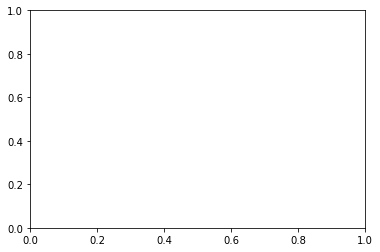

In [519]:
predicted = cross_val_predict(rf_model, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [469]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train, y_train)
# Predict on test set
y_pred = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [514]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)
# Predict on test set
y_pred = sgd_model.predict(X_test)
print(sgd_model.score(X_train, y_train))
print(sgd_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [515]:
from numpy import where

# model fit label encoded data

In [525]:
fit_search(X_ts, y_train)

best parameters are: RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=2,
                       n_jobs=-1)
cv results: {'mean_fit_time': array([0.61369292, 0.07947119, 0.08144855, 0.10704684, 1.30983774,
       1.79156097, 1.83874671, 1.79587158, 1.81372968, 1.78540897,
       0.601384  , 0.10372289, 0.08444277, 0.08478538, 1.31880879,
       1.80168287, 1.79055293, 1.83509851, 1.80434362, 1.7952079 ,
       0.60855969, 0.08378704, 0.08844153, 0.08180197, 1.29320439,
       1.87166595, 1.84289893, 1.9659191 , 1.86900242, 1.96095268,
       0.66572364, 0.0887626 , 0.088763  , 0.08843088, 1.47036068,
       2.05889018, 2.03107945, 2.01144449, 2.01791946, 2.09083207]), 'std_fit_time': array([0.75506143, 0.00261125, 0.00490833, 0.03581466, 0.70372849,
       0.02693931, 0.05904647, 0.03291983, 0.01108422, 0.01580434,
       0.73447422, 0.02681028, 0.00169458, 0.00217058, 0.68857528,
       0.01430985, 0.01474988, 0.02346798, 0.01017293, 0.01781023,
       0.74353054, 0.

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')
cv results: {'mean_fit_time': array([0.00398946, 0.00531729]), 'std_fit_time': array([3.37174788e-07, 4.65415594e-04]), 'mean_score_time': array([0.01562484, 0.01428636]), 'std_score_time': array([0.00047025, 0.00045698]), 'param_algorithm': masked_array(data=['ball_tree', 'kd_tree'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['distance', 'distance'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'algorithm': 'ball_tree', 'weights': 'distance'}, {'algorithm': 'kd_tree', 'weights': 'distance'}], 'split0_test_score': array([0.99630826, 0.99630826]), 'split1_test_score': array([0.99907664, 0.99907664]), 'split2_test_score': array([0.99538319, 0.99538319]), 'mean_test_score': array([0.9969227, 0.9969227]), 'std_test_score': array([0.00156919, 0.00156919]), 'rank_test_score': array(

In [456]:
rf_model = RandomForestClassifier(max_depth=8, max_features=2, n_jobs=-1)
rf_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = rf_model.predict(X_tests)
print(rf_model.score(X_ts, y_train2))
print(rf_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]


In [472]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = kn_model.predict(X_tests)
print(kn_model.score(X_ts, y_train2))
print(kn_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [473]:
svc_model = SVC(C=10, degree=1)
svc_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = svc_model.predict(X_tests)
print(svc_model.score(X_ts, y_train2))
print(svc_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [474]:
sgd_model = SGDClassifier()
sgd_model.fit(X_ts, y_train2)
sgd_model.score(X_tests, y_test2)
# Predict on test set
y_pred = sgd_model.predict(X_tests)
print(sgd_model.score(X_ts, y_train2))
print(sgd_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.7978150484689952
0.8043076923076923
[[715 128]
 [190 592]]
              precision    recall  f1-score   support

      edible       0.79      0.85      0.82       843
   poisonous       0.82      0.76      0.79       782

    accuracy                           0.80      1625
   macro avg       0.81      0.80      0.80      1625
weighted avg       0.81      0.80      0.80      1625



# feature selected dataset ohe

In [526]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        #'max_features': [2, 3, 5, 7, 10],
        'criterion': ['gini'],
        'max_depth':[3, 5, 8, 10],
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
        'loss':['hinge', 'log',],
},
    
    'clf_svm' : {
        'kernel': ['rbf',], 
        'degree' : [1, 2,],
        'C': [.01, .05, 1, 10, ],
},
    
}

In [527]:
fit_search(X_train3, y_train3)

best parameters are: RandomForestClassifier(max_depth=10, n_jobs=-1)
cv results: {'mean_fit_time': array([0.6828533 , 0.10239752, 0.10139513, 0.098406  ]), 'std_fit_time': array([0.83099803, 0.00248443, 0.00285953, 0.00401973]), 'mean_score_time': array([0.02592707, 0.02692334, 0.02626332, 0.02459908]), 'std_score_time': array([0.00293823, 0.00495458, 0.00204915, 0.00169652]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 8, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[-1, -1, -1, -1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini', 'max_depth': 3, 'n_jobs': -1}, {'criterion': 'gini', 'max_depth': 5, 'n_jobs': -1}, {'criterion': 'gini', 'max_depth':

In [529]:
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1, criterion='gini')
rf_model.fit(X_train3, y_train3)
# Predict on test set
y_pred = rf_model.predict(X_test3)
print(rf_model.score(X_train3, y_train3))
print(rf_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [507]:
print([y_test3.names[rf_model.predict([[y_test3]])]
       print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

SyntaxError: unexpected EOF while parsing (<ipython-input-507-bfd7ff23bd1c>, line 1)

In [475]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train3, y_train3)

# Predict on test set
y_pred = kn_model.predict(X_test3)
print(kn_model.score(X_train3, y_train3))
print(kn_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [476]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train3, y_train3)
# Predict on test set
y_pred = svc_model.predict(X_test3)
print(svc_model.score(X_train3, y_train3))
print(svc_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [477]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train3, y_train3)
sgd_model.score(X_test3, y_test3)
# Predict on test set
y_pred = sgd_model.predict(X_test3)
print(sgd_model.score(X_train3, y_train3))
print(sgd_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9583012771195568
0.955076923076923
[[816  27]
 [ 46 736]]
              precision    recall  f1-score   support

      edible       0.95      0.97      0.96       843
   poisonous       0.96      0.94      0.95       782

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.96      0.96      1625



# features selected by var

In [528]:
fit_search(X_train4, y_train4)

best parameters are: RandomForestClassifier(max_depth=10, n_jobs=-1)
cv results: {'mean_fit_time': array([0.10439754, 0.10572783, 0.10673674, 0.10872046]), 'std_fit_time': array([0.0044713 , 0.00242995, 0.00216962, 0.00374574]), 'mean_score_time': array([0.02259604, 0.02359327, 0.02291679, 0.02425742]), 'std_score_time': array([0.00048497, 0.00124093, 0.0008014 , 0.00093322]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 8, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_jobs': masked_array(data=[-1, -1, -1, -1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini', 'max_depth': 3, 'n_jobs': -1}, {'criterion': 'gini', 'max_depth': 5, 'n_jobs': -1}, {'criterion': 'gini', 'max_depth':

In [530]:
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1)
rf_model.fit(X_train4, y_train4)
# Predict on test set
y_pred = rf_model.predict(X_test4)
print(rf_model.score(X_train4, y_train4))
print(rf_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [531]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train4, y_train4)

# Predict on test set
y_pred = kn_model.predict(X_test4)
print(kn_model.score(X_train4, y_train4))
print(kn_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [502]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train4, y_train4)
# Predict on test set
y_pred = svc_model.predict(X_test4)
print(svc_model.score(X_train4, y_train4))
print(svc_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [503]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train4, y_train4)
sgd_model.score(X_test4, y_test4)
# Predict on test set
y_pred = sgd_model.predict(X_test4)
print(sgd_model.score(X_train4, y_train4))
print(sgd_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

